In [1]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib


In [2]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Matplotlib is building the font cache; this may take a moment.


In [3]:
# Import the dataset
TenYearCHD_df = pd.read_csv('HeartDisease.csv',sep=";" )
TenYearCHD_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


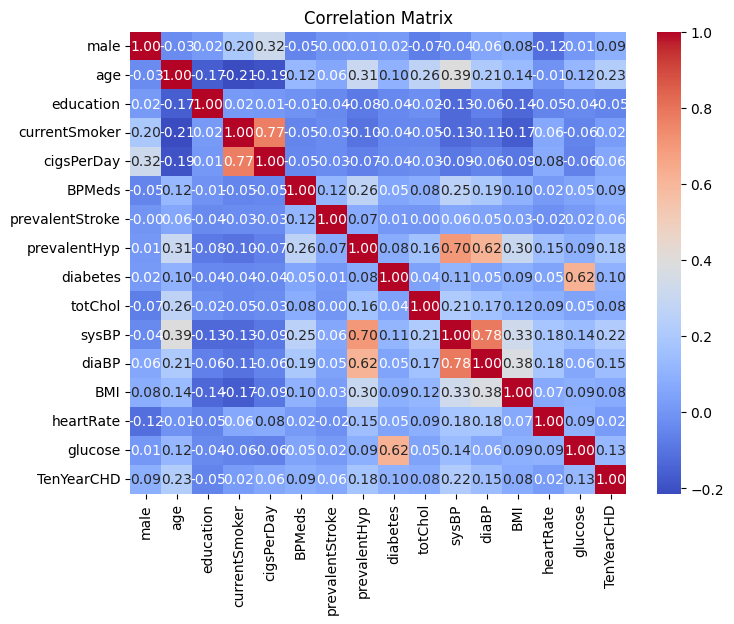

In [4]:
#Checking correlation between independent variable to make sure all variable did not correlated each other.
TenYearCHD_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(TenYearCHD_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [5]:
#Data Preprocessing
# We only choose some field to develop the model which has the biggest correlation with our target "TenYearCHD"
TenYearCHD_df = TenYearCHD_df[['age', 'cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI','glucose','TenYearCHD']]
TenYearCHD_df['TenYearCHD'] = TenYearCHD_df['TenYearCHD'].astype('int')
TenYearCHD_df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...
4233,50,1.0,313.0,179.0,92.0,25.97,86.0,1
4234,51,43.0,207.0,126.5,80.0,19.71,68.0,0
4235,48,20.0,248.0,131.0,72.0,22.00,86.0,0
4236,44,15.0,210.0,126.5,87.0,19.16,NaN,0


In [6]:
#Checking Missing Value
#We can see there are missing value on several features.
print(TenYearCHD_df.isnull().sum())

age             0
cigsPerDay     29
totChol        50
sysBP           0
diaBP           0
BMI            19
glucose       388
TenYearCHD      0
dtype: int64


In [7]:
#In this process we remove the missing values to clean our dataset.
TenYearCHD_df[['cigsPerDay', 'totChol','BMI','glucose']]=TenYearCHD_df[['cigsPerDay', 'totChol','BMI','glucose']].fillna('0')
TenYearCHD_df
print(TenYearCHD_df.isnull().sum())

age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
glucose       0
TenYearCHD    0
dtype: int64


In [8]:
#Setting the variable
#In this process we set the dependant and independant variable for our model. Since our target is to predict 'TenYearCHD', we set it as Y and the rest will be set as independent variables (X).
X = np.asarray(TenYearCHD_df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','glucose']])
X[0:5] #print the first 5 values

array([[39, 0.0, 195.0, 106.0, 70.0, 26.97, 77.0],
       [46, 0.0, 250.0, 121.0, 81.0, 28.73, 76.0],
       [48, 20.0, 245.0, 127.5, 80.0, 25.34, 70.0],
       [61, 30.0, 225.0, 150.0, 95.0, 28.58, 103.0],
       [46, 23.0, 285.0, 130.0, 84.0, 23.1, 85.0]], dtype=object)

In [9]:
y = np.asarray(TenYearCHD_df['TenYearCHD'])
y[0:5] #print the first 5 values

array([0, 0, 0, 1, 0])

In [10]:
#It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of StandardScalar function in the Scikit-Learn library.
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.23495068, -0.75132224, -0.76087026, -1.19590711, -1.08262515,
         0.29039572,  0.07720798],
       [-0.41825733, -0.75132224,  0.31411609, -0.51518725, -0.15898843,
         0.68854851,  0.0467814 ],
       [-0.18491638,  0.92920959,  0.21639006, -0.22020864, -0.24295541,
        -0.07834806, -0.13577807],
       [ 1.33179984,  1.76947551, -0.17451407,  0.80087114,  1.0165492 ,
         0.65461504,  0.86829905],
       [-0.41825733,  1.18128937,  0.99819832, -0.10675533,  0.09291249,
        -0.58508798,  0.32062062]])

In [11]:
#This process is to splitting the dataset into training dan test dataset.
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.4,random_state=42)

In [12]:
#Build the model using LogisticRegression from the Scikit-learn package and fit our model with train data set
LR = LogisticRegression().fit(X_train,y_train)

In [13]:
custom_threshold = 0.5

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.70668436, 0.29331564],
       [0.92448948, 0.07551052],
       [0.87543873, 0.12456127],
       [0.84736337, 0.15263663],
       [0.91264001, 0.08735999],
       [0.82173298, 0.17826702],
       [0.87902366, 0.12097634],
       [0.76644634, 0.23355366],
       [0.83758772, 0.16241228],
       [0.6412986 , 0.3587014 ]])

In [15]:
#Predicting TenYearCHD parameter using test dataset and check the probability of data point using predict_prob
yhat = (yhat_prob[:,1] >= custom_threshold).astype(int)

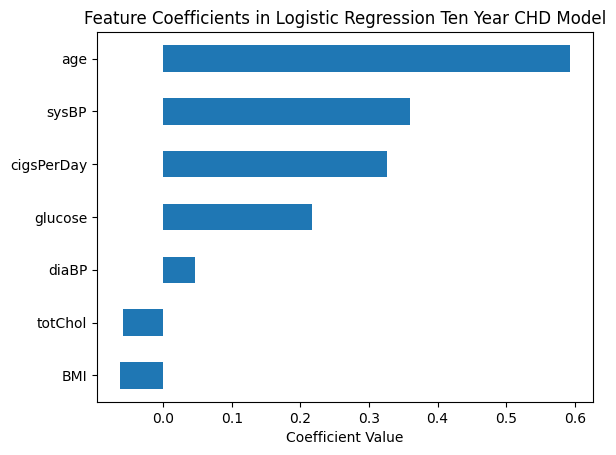

In [16]:
#You can also examine what role each input feature has to play in the prediction. Consider the code below
coefficients = pd.Series(LR.coef_[0], index=TenYearCHD_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Ten Year CHD Model")
plt.xlabel("Coefficient Value")
plt.show()
#We can see that 'age' has the biggest effect on TenYearCHD with arround 60% 

In [17]:
#We have to check our performance model.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_test, yhat, labels=[1,2])

array([[19,  0],
       [ 0,  0]], dtype=int64)

In [18]:
#This model has 86% Accuaracy which means this model performed well.
print(f"Logistic Regression Testing Accuracy: {accuracy_score(y_test, yhat):.3f}")

Logistic Regression Testing Accuracy: 0.857


In [19]:
#Based on classification report, this model have a good prediction for class 0 with 92% F1-Score but it has a bad result for class 1 with only 14% F1-Score
print("\nLogistic Regression Test Classification Report:")
print(classification_report(y_test, yhat))


Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1445
           1       0.66      0.08      0.14       251

    accuracy                           0.86      1696
   macro avg       0.76      0.53      0.53      1696
weighted avg       0.83      0.86      0.81      1696



In [20]:
log_loss(y_test, yhat_prob)
#Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.
#This indicate the model has perform well but only for class 0, for increasing class 1 we need to 

0.3837987114061253